In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

<Figure size 640x480 with 0 Axes>

In [2]:
def load_data():
    data=pd.read_csv(r"Data\pd_speech_features.csv",)
    data.columns = data.iloc[0]
    data= data.iloc[1: , :]
    data=data.drop('id',axis=1)
    data=data.sample(frac=1)
    labels=data['class']
    data=data.drop('class',axis=1)
    
    return data,labels

data,labels=load_data()

In [3]:
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
411,0,0.78991,0.83561,0.3334,372,371,0.005186792,4.90E-05,0.00113,5.86E-06,...,112.2577,61.1446,20.2593,6.4921,6.5002,9.5002,9.8331,8.0799,6.9204,2.6948
426,1,0.49231,0.75583,0.8498,112,107,0.009241015,0.000589142,0.02775,0.00025648,...,11.8991,1.9327,2.1889,29.3002,28.1956,27.2019,43.3029,53.5871,40.2744,93.142
31,1,0.79196,0.66429,0.69379,212,211,0.009104241,0.000111466,0.00354,3.22E-05,...,2.2994,2.151,2.119,4.3379,5.9496,4.1898,3.1736,2.9994,2.9446,3.8043
538,1,0.24164,0.78342,0.63352,239,238,0.00809496,0.000158005,0.00214,1.73E-05,...,1.5769,1.6122,14.7791,20.4438,5.5828,4.4942,6.0828,14.0307,10.646,10.9042
468,1,0.86364,0.83083,0.55985,250,249,0.007711596,9.04E-05,0.00369,2.85E-05,...,1.5707,1.744,95.1695,25.3594,4.0593,3.2636,3.913,3.4838,3.0588,3.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1,0.80665,0.61493,0.6002,242,241,0.007971983,6.86E-05,0.00162,1.29E-05,...,1.8661,1.8574,3.7109,2.9855,2.6307,2.6897,3.8939,6.5859,8.7967,14.1727
515,0,0.79225,0.72175,0.45346,346,345,0.00557753,5.28E-05,0.00098,5.44E-06,...,6.2307,5.3425,6.3238,7.2737,4.2224,3.1236,2.7313,18.7789,22.4631,83.3482
622,1,0.80765,0.7747,0.48003,272,271,0.007086226,7.20E-05,0.00151,1.07E-05,...,1.5455,2.5053,2.8389,3.3534,3.4437,4.561,5.0762,3.484,3.4902,4.2894
687,1,0.83405,0.76165,0.44345,285,284,0.006772009,5.71E-05,0.00123,8.34E-06,...,1.7055,15.2594,36.4588,13.5266,4.8854,3.7817,5.6088,34.6387,34.4628,81.7748


In [4]:
data.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,2,740,745,748,315,319,755,646,358,543,...,750,749,755,752,753,749,752,753,753,754
top,1,0.82273,0.67772,0.34552,237,236,0.006004477,5.72E-05,0.00076,1.39E-05,...,1.5769,1.7726,4.0251,2.8454,3.8369,2.6829,3.1761,3.1854,4.6983,3.2941
freq,390,3,2,2,9,8,2,3,9,10,...,2,2,2,2,2,2,2,2,2,2


In [5]:
data.isnull().sum()

0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_32    0
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
Length: 753, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data_scaled

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,-1.032266,0.257864,1.940467,-1.133279,0.484378,0.486441,-0.642778,-0.459234,-0.454801,-0.475130,...,2.088255,0.827330,-0.079161,-0.473962,-0.367988,-0.152981,-0.155671,-0.427653,-0.542947,-0.841500
1,0.968742,-1.501193,0.795386,2.626417,-2.137821,-2.171186,1.578448,0.283569,9.681276,10.475578,...,-0.208912,-0.576036,-0.633385,0.419752,0.715008,0.843071,1.893812,2.468662,1.769540,1.802510
2,0.968742,0.269981,-0.518486,1.490572,-1.129283,-1.124242,1.503512,-0.373331,0.462853,0.675783,...,-0.428646,-0.570862,-0.635529,-0.558373,-0.395473,-0.451790,-0.563457,-0.751003,-0.818596,-0.809066
3,0.968742,-2.982856,1.191385,1.051771,-0.856977,-0.852440,0.950548,-0.309330,-0.070224,0.024735,...,-0.445183,-0.583632,-0.247240,0.072722,-0.413783,-0.434662,-0.385316,-0.048913,-0.284645,-0.601517
4,0.968742,0.693668,1.871860,0.515410,-0.746038,-0.741705,0.740511,-0.402301,0.519968,0.514113,...,-0.445325,-0.580508,2.218354,0.265335,-0.489833,-0.503906,-0.518181,-0.720173,-0.810678,-0.825612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.968742,0.356811,-1.226950,0.809182,-0.826721,-0.822239,0.883171,-0.432280,-0.268224,-0.167521,...,-0.438564,-0.577821,-0.586705,-0.611365,-0.561147,-0.536198,-0.519350,-0.522739,-0.412860,-0.505970
752,-1.032266,0.271695,0.306236,-0.259171,0.222159,0.224705,-0.428701,-0.454008,-0.511916,-0.493481,...,-0.338660,-0.495221,-0.506566,-0.443336,-0.481692,-0.511783,-0.590541,0.253287,0.534654,1.516212
753,0.968742,0.362721,1.066227,-0.065726,-0.524160,-0.520236,0.397883,-0.427604,-0.310109,-0.263649,...,-0.445902,-0.562465,-0.613449,-0.596949,-0.520563,-0.430903,-0.446954,-0.720160,-0.780768,-0.794885
754,0.968742,0.518767,0.878920,-0.332050,-0.393050,-0.389368,0.225730,-0.448095,-0.416724,-0.366767,...,-0.442240,-0.260183,0.417682,-0.198322,-0.448596,-0.474753,-0.414341,1.262687,1.366613,1.470217


In [7]:
# Method 1 for dimension reduction
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(random_state=2,max_depth=10)
model1.fit(data,labels)
print("Dimension Reduction done")

Dimension Reduction done


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
411,0,0.78991,0.83561,0.3334,372,371,0.005186792,4.90E-05,0.00113,5.86E-06,...,112.2577,61.1446,20.2593,6.4921,6.5002,9.5002,9.8331,8.0799,6.9204,2.6948
426,1,0.49231,0.75583,0.8498,112,107,0.009241015,0.000589142,0.02775,0.00025648,...,11.8991,1.9327,2.1889,29.3002,28.1956,27.2019,43.3029,53.5871,40.2744,93.142
31,1,0.79196,0.66429,0.69379,212,211,0.009104241,0.000111466,0.00354,3.22E-05,...,2.2994,2.151,2.119,4.3379,5.9496,4.1898,3.1736,2.9994,2.9446,3.8043
538,1,0.24164,0.78342,0.63352,239,238,0.00809496,0.000158005,0.00214,1.73E-05,...,1.5769,1.6122,14.7791,20.4438,5.5828,4.4942,6.0828,14.0307,10.646,10.9042
468,1,0.86364,0.83083,0.55985,250,249,0.007711596,9.04E-05,0.00369,2.85E-05,...,1.5707,1.744,95.1695,25.3594,4.0593,3.2636,3.913,3.4838,3.0588,3.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1,0.80665,0.61493,0.6002,242,241,0.007971983,6.86E-05,0.00162,1.29E-05,...,1.8661,1.8574,3.7109,2.9855,2.6307,2.6897,3.8939,6.5859,8.7967,14.1727
515,0,0.79225,0.72175,0.45346,346,345,0.00557753,5.28E-05,0.00098,5.44E-06,...,6.2307,5.3425,6.3238,7.2737,4.2224,3.1236,2.7313,18.7789,22.4631,83.3482
622,1,0.80765,0.7747,0.48003,272,271,0.007086226,7.20E-05,0.00151,1.07E-05,...,1.5455,2.5053,2.8389,3.3534,3.4437,4.561,5.0762,3.484,3.4902,4.2894
687,1,0.83405,0.76165,0.44345,285,284,0.006772009,5.71E-05,0.00123,8.34E-06,...,1.7055,15.2594,36.4588,13.5266,4.8854,3.7817,5.6088,34.6387,34.4628,81.7748


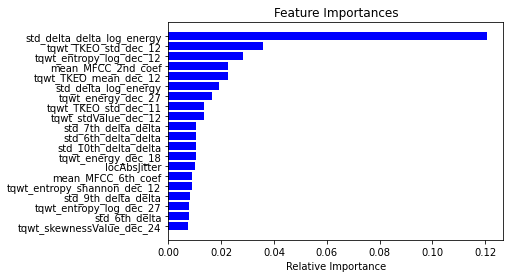

In [32]:
features=data.columns
importances=model1.feature_importances_
indices = np.argsort(importances)[-20:]  # top 80 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
selected_features=[features[i] for i in indices]

In [9]:
data_after_RF=data[selected_features]

In [10]:
data_after_RF

,tqwt_skewnessValue_dec_24,std_6th_delta,tqwt_entropy_log_dec_27,std_9th_delta_delta,tqwt_entropy_shannon_dec_12,mean_MFCC_6th_coef,locAbsJitter,tqwt_energy_dec_18,std_10th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,tqwt_stdValue_dec_12,tqwt_TKEO_std_dec_11,tqwt_energy_dec_27,std_delta_log_energy,tqwt_TKEO_mean_dec_12,mean_MFCC_2nd_coef,tqwt_entropy_log_dec_12,tqwt_TKEO_std_dec_12,std_delta_delta_log_energy
411,-0.00029958,0.032073,-10726.3095,0.015058,48.4839,-0.19598,5.86E-06,0.005927,0.013091,0.014143,0.017356,0.021192,0.00019547,0.00016759,0.018759,0.00053895,2.3489,-145042.4744,0.00075748,0.0051358
426,-1.20E-18,0.040426,-9176.9057,0.015722,8.4419,-1.0409,0.00025648,0.083219,0.017352,0.018588,0.020494,0.0076739,2.18E-05,0.00033607,0.048941,4.14E-05,3.9355,-172557.0039,4.52E-05,0.022452
31,2.32E-18,0.075811,-6369.9783,0.020066,0.086544,-2.8153,3.22E-05,0.21857,0.018476,0.035266,0.024964,0.00063748,6.81E-06,0.067101,0.07242,5.54E-07,2.2431,-261249.66,1.30E-06,0.026327
538,-0.0019922,0.041979,17.621,0.016949,16.7259,0.38704,1.73E-05,0.12811,0.015995,0.020189,0.019487,0.011591,0.00024843,0.27013,0.028962,0.00012562,1.6865,-164970.5561,0.00031427,0.011061
468,0.00041304,0.050808,549.294,0.017201,137.6285,-1.1413,2.85E-05,0.020056,0.017581,0.023861,0.028446,0.040842,0.0025688,0.41665,0.015464,0.0027555,1.4488,-130406.8761,0.0049282,0.0060511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.0088649,0.061597,-5075.6649,0.02768,26.6079,-1.4697,1.29E-05,0.019566,0.027767,0.033289,0.03063,0.014968,0.00012132,0.059441,0.039684,0.00023119,1.1062,-156747.1144,0.00033258,0.016826
515,1.60E-17,0.057036,-14711.0868,0.032378,0.2675,-0.63448,5.44E-06,0.087692,0.025188,0.026885,0.029635,0.0011556,1.39E-06,0.00048897,0.073896,1.45E-06,1.9985,-236364.5077,2.25E-06,0.028994
622,1.04E-17,0.067411,-2869.6198,0.026591,1.8727,-0.9291,1.07E-05,0.019044,0.022668,0.032264,0.031133,0.0033371,1.22E-05,0.16015,0.028267,5.85E-06,2.2783,-201009.6316,1.70E-05,0.01019
687,-0.0015199,0.066852,-2962.8412,0.024793,5.6792,-2.0149,8.34E-06,0.077782,0.028525,0.033678,0.028338,0.0062376,0.00025729,0.078626,0.028909,4.36E-05,2.3952,-184099.5388,8.91E-05,0.01239


In [11]:
labels

411    0
426    1
31     1
538    1
468    1
      ..
171    1
515    1
622    1
687    1
187    1
Name: class, Length: 756, dtype: object

<h1 > Halt and Stop </h1>
<h2> PCA Code </h2>

In [ ]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
principalComponents = pca_1.fit_transform(data)
data_after_RF=pd.DataFrame(principalComponents)
data_after_RF

<h2> PCA STOP </h2>

In [21]:
# Defining Splitter for the dataset (Common for all)
def splitter(len_array,lower_bound, incrementor, start_idx):
    final=0
    per=[]
    sp=[start_idx]
    for i in range(lower_bound,100,incrementor):
        if final+i>100:
            break
        per.append(i)
        final+=i
    for i in per:
        len_of_data=round((i/100)*len_array)
        sp.append(sp[-1]+len_of_data)
    return per,sp

lower_bound=5
incrementor=5
start_idx=0

        
spliting_percentage, spliting_position=splitter(len(data),lower_bound,incrementor,start_idx)
print("Splitting Percentages are: {}".format(spliting_percentage))
print("Splitting Position are: {}".format(spliting_position))

Splitting Percentages are: [5, 10, 15, 20, 25]
Splitting Position are: [0, 38, 114, 227, 378, 567]


In [22]:
data_for_experiment=data_after_RF.copy(deep=True)
labels_for_experiment=labels.copy(deep=True)

# Apply ML Algorithms

# ************************************** Logistic Regression **************************************************

In [ ]:
# SImple Algorithm
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2']
    c_values = [100]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    y_pred = grid_search.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
#     print("Training set score for logreg_model: %f" % grid_search.score(X_train , y_train))
#     print("Testing  set score for logreg_model: %f" % grid_search.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

In [ ]:
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))

    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2','l1']
    c_values = [10]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    Y_pred = grid_search.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))

    print("******************End of iteration******************\n")

# ****KNN Classifer ****

In [ ]:
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

In [ ]:
# splitting dataset into training and testing part
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,Y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

# ** Support Vector Machine **

In [ ]:
# splitting dataset into training and testing part


test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [2]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

In [ ]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

# ** Decision Tree **

In [19]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8096234996633992 

Best depth: 8 

Best #features: None 

[[29 13]
 [11 99]]


              precision    recall  f1-score   support

           0       0.72      0.69      0.71        42
           1       0.88      0.90      0.89       110

    accuracy                           0.84       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.84      0.84      0.84       152

Training set score for dc_model: 0.985099
Testing  set score for dc_model: 0.842105
******************End of iteration******************



In [21]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,Y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
Best score for training data: 0.7606837606837606 

Best depth: 8 

Best #features: None 

[[ 6  5]
 [ 6 21]]


              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.81      0.78      0.79        27

    accuracy                           0.71        38
   macro avg       0.65      0.66      0.66        38
weighted avg       0.72      0.71      0.71        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.710526
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)
Shape of training

<h1> **************************************************************************************************************</h1>

<h1> AdaBoost </h1>


In [23]:
# splitting dataset into training and testing part

test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.81668378702277 

Best estimator: 4 

Best #learning rate: 0.01 

Best algorithm: SAMME 

[[ 32  31]
 [ 20 144]]


              precision    recall  f1-score   support

           0       0.62      0.51      0.56        63
           1       0.82      0.88      0.85       164

    accuracy                           0.78       227
   macro avg       0.72      0.69      0.70       227
weighted avg       0.77      0.78      0.77       227

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.775330
******************End of iteration******************

******************Start of iteration******************

For ratio  0.25
Best score for training data: 0.8059964726631393 

Best estimator: 4 

Best #learning rate: 0.1 

Best algorithm: SAMME.R 

[[ 33  19]
 [ 14 123]]


              precision    recall  f1-score   support

           0       0.70      0.63      0.6

In [26]:
# splitting dataset into training and testing part


for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (189,)
Shape of testing output Y_test: (189, 1)
Best score for training data: 0.844017094017094 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME.R 

[[ 4  3]
 [10 21]]


              precision    recall  f1-score   support

           0       0.29      0.57      0.38         7
           1       0.88      0.68      0.76        31

    accuracy                           0.66        38
   macro avg       0.58      0.62      0.57        38
weighted avg       0.77      0.66      0.69        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.657895
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input

# ** Ensemble Learning **

In [19]:

test_data_ratio=[0.20]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(y_test,Y_pred))
    print(classification_report(y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , y_test ))
    

    score = accuracy_score(y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
[[ 18  21]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.84      0.97      0.90       113

    accuracy                           0.84       152
   macro avg       0.85      0.72      0.75       152
weighted avg       0.84      0.84      0.82       152

Training set score for EL: 0.847682
Testing  set score for EL: 0.842105
Hard Voting Score  0
******************End of iteration******************



In [25]:

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,Y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , Y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , Y_test ))
    

    score = accuracy_score(Y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
[[ 0 12]
 [ 0 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      1.00      0.81        26

    accuracy                           0.68        38
   macro avg       0.34      0.50      0.41        38
weighted avg       0.47      0.68      0.56        38

Training set score for EL: 0.789474
Testing  set score for EL: 0.684211
Hard Voting Score  0
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)
Shape of training output Y_train: (76,)
Shape of testing output Y_test: (76, 1)


C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 7 10]
 [ 0 59]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        17
           1       0.86      1.00      0.92        59

    accuracy                           0.87        76
   macro avg       0.93      0.71      0.75        76
weighted avg       0.89      0.87      0.85        76

Training set score for EL: 0.921053
Testing  set score for EL: 0.868421
Hard Voting Score  0
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 15
Shape of training input X_train: (113, 20)
Shape of testing input X_test: (113, 20)
Shape of training output Y_train: (113,)
Shape of testing output Y_test: (113, 1)
[[ 1 38]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        39
           1       0.66      1.00      0.80        74

    accuracy                           0.66       113
   macro avg       0.8

# ** Random Forest **

In [29]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[10,15,20]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8559266374398634 

Best depth: 6 

Best #estimators: 100 

Best jobs: 10 

[[ 15  23]
 [  5 109]]


              precision    recall  f1-score   support

           0       0.75      0.39      0.52        38
           1       0.83      0.96      0.89       114

    accuracy                           0.82       152
   macro avg       0.79      0.68      0.70       152
weighted avg       0.81      0.82      0.79       152

Training set score for dc_model: 0.950331
Testing  set score for dc_model: 0.815789
******************End of iteration******************



In [31]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[2]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (189,)
Shape of testing output Y_test: (189, 1)
Best score for training data: 0.8183760683760685 

Best depth: 5 

Best #estimators: 100 

Best jobs: 2 

[[ 7  4]
 [ 1 26]]


              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.87      0.96      0.91        27

    accuracy                           0.87        38
   macro avg       0.87      0.80      0.82        38
weighted avg       0.87      0.87      0.86        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.868421
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)

# ...........THANK YOU.........HAPPY CODING.......